In [134]:
from riotwatcher import LolWatcher, ApiError

key = open('C:/Users/ThinkPad/Desktop/league test code/api_key.txt','r')
key=key.read()

lol_watcher = LolWatcher(key)

#Region codes BR1 EUN1 EUW1 JP1 KR LA1 LA2 NA1 OC1 TR1 RU servers. Codes might change as RIOT loves to make our life difficult
region = 'euw1' 

playerInfo = lol_watcher.summoner.by_name(region, 'Thebausffs')

In [135]:
player_ranked_stats = lol_watcher.league.by_summoner(region, playerInfo['id'])
player_ranked_stats


[{'leagueId': '038ccfd7-e490-4deb-a8bc-3530da13ef05',
  'queueType': 'RANKED_TFT_DOUBLE_UP',
  'tier': 'GOLD',
  'rank': 'II',
  'summonerId': '4WuWK6EA6X2FPLxi-thRXZCgjp2GhM9Ea8mCQ1f_3ocqVtKl',
  'summonerName': 'Thebausffs',
  'leaguePoints': 70,
  'wins': 47,
  'losses': 41,
  'veteran': False,
  'inactive': False,
  'freshBlood': False,
  'hotStreak': False},
 {'leagueId': 'f6134c21-afc2-3c72-8b43-5259ec512b58',
  'queueType': 'RANKED_SOLO_5x5',
  'tier': 'MASTER',
  'rank': 'I',
  'summonerId': '4WuWK6EA6X2FPLxi-thRXZCgjp2GhM9Ea8mCQ1f_3ocqVtKl',
  'summonerName': 'Thebausffs',
  'leaguePoints': 463,
  'wins': 511,
  'losses': 495,
  'veteran': True,
  'inactive': False,
  'freshBlood': False,
  'hotStreak': False}]

In [136]:
import pandas as pd
pd.set_option('display.max_columns',None)
df = pd.DataFrame(player_ranked_stats)
pd.DataFrame(player_ranked_stats)

,leagueId,queueType,tier,rank,summonerId,summonerName,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak
0,038ccfd7-e490-4deb-a8bc-3530da13ef05,RANKED_TFT_DOUBLE_UP,GOLD,II,4WuWK6EA6X2FPLxi-thRXZCgjp2GhM9Ea8mCQ1f_3ocqVtKl,Thebausffs,70,47,41,False,False,False,False
1,f6134c21-afc2-3c72-8b43-5259ec512b58,RANKED_SOLO_5x5,MASTER,I,4WuWK6EA6X2FPLxi-thRXZCgjp2GhM9Ea8mCQ1f_3ocqVtKl,Thebausffs,463,511,495,True,False,False,False


In [137]:
df1 = df.T
df1.loc[["summonerName","queueType","tier",'rank','wins','losses']]

,0,1
summonerName,Thebausffs,Thebausffs
queueType,RANKED_TFT_DOUBLE_UP,RANKED_SOLO_5x5
tier,GOLD,MASTER
rank,II,I
wins,47,511
losses,41,495


In [138]:
#lol_watcher.champion_mastery.by_summoner(region, playerInfo['id'])

In [139]:
Champ_mastery = lol_watcher.champion_mastery.by_summoner(region, playerInfo['id'])
mostPlayedChamp = pd.DataFrame(Champ_mastery[:10]) #Taking top 10 champion played by The player

In [140]:
numberOfChampPlayer = len(pd.DataFrame(Champ_mastery))

In [141]:
leastPlayedChamp = pd.DataFrame(Champ_mastery[(numberOfChampPlayer-10):]) #10 least played champion

In [142]:
#droping unnecessary columns
leastPlayedChamp1 = leastPlayedChamp.drop(["summonerId","chestGranted","tokensEarned","championPointsUntilNextLevel"],axis =1)

In [143]:
#converting the  Unix milliseconds to year-month-day
import datetime
lastPlayed = []

for i in range(len(leastPlayedChamp)):
    time_in_millis = leastPlayedChamp.lastPlayTime[i]
    dt = datetime.datetime.fromtimestamp(time_in_millis / 1000)
    lastPlayed.append(dt.strftime('%Y-%m-%d'))

In [144]:
leastPlayedChamp1['lastPlayTime'] = lastPlayed

In [145]:
leastPlayedChamp1

,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel
0,111,1,767,2020-12-03,767
1,72,1,750,2020-12-18,750
2,360,1,747,2022-03-20,747
3,163,1,626,2018-07-15,626
4,48,1,570,2022-03-19,570
5,201,1,468,2021-07-09,468
6,887,1,371,2021-04-20,371
7,101,1,283,2021-05-08,283
8,526,1,175,2021-12-24,175
9,89,1,125,2020-01-30,125


In [146]:
mostPlayed = []

for i in range(len(mostPlayedChamp)):
    time_in_millis = mostPlayedChamp.lastPlayTime[i]
    dt = datetime.datetime.fromtimestamp(time_in_millis / 1000)
    mostPlayed.append(dt.strftime('%Y-%m-%d'))

In [147]:
mostPlayedChamp['lastPlayTime'] = mostPlayed

In [148]:
mostPlayedChamp1 = mostPlayedChamp.drop(["summonerId","chestGranted","tokensEarned","championPointsUntilNextLevel"],axis =1)
mostPlayedChamp1

,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel
0,14,7,3542385,2022-07-28,3520785
1,79,6,1099565,2022-07-29,1077965
2,240,7,533931,2022-06-16,512331
3,133,7,307338,2022-07-28,285738
4,26,6,225468,2022-07-14,203868
5,43,6,122259,2022-07-24,100659
6,202,6,110458,2022-07-20,88858
7,106,6,77559,2022-07-10,55959
8,154,6,75562,2022-07-28,53962
9,31,6,59747,2022-07-14,38147


In [149]:
##requesting and pulling all champion data from data dragon api
versions = lol_watcher.data_dragon.versions_for_region(region)
item_version = versions['n']['item'] #checking the current patch

current_champ_list = lol_watcher.data_dragon.champions(item_version) #requesting all the champ details from the current patch

In [150]:
df = pd.DataFrame(current_champ_list['data'])
df = df.T
df

,version,id,key,name,title,blurb,info,image,tags,partype,stats
Aatrox,12.14.1,Aatrox,266,Aatrox,the Darkin Blade,Once honored defenders of Shurima against the ...,"{'attack': 8, 'defense': 4, 'magic': 3, 'diffi...","{'full': 'Aatrox.png', 'sprite': 'champion0.pn...","[Fighter, Tank]",Blood Well,"{'hp': 650, 'hpperlevel': 114, 'mp': 0, 'mpper..."
Ahri,12.14.1,Ahri,103,Ahri,the Nine-Tailed Fox,Innately connected to the latent power of Rune...,"{'attack': 3, 'defense': 4, 'magic': 8, 'diffi...","{'full': 'Ahri.png', 'sprite': 'champion0.png'...","[Mage, Assassin]",Mana,"{'hp': 570, 'hpperlevel': 96, 'mp': 418, 'mppe..."
Akali,12.14.1,Akali,84,Akali,the Rogue Assassin,Abandoning the Kinkou Order and her title of t...,"{'attack': 5, 'defense': 3, 'magic': 8, 'diffi...","{'full': 'Akali.png', 'sprite': 'champion0.png...",[Assassin],Energy,"{'hp': 570, 'hpperlevel': 119, 'mp': 200, 'mpp..."
Akshan,12.14.1,Akshan,166,Akshan,the Rogue Sentinel,"Raising an eyebrow in the face of danger, Aksh...","{'attack': 0, 'defense': 0, 'magic': 0, 'diffi...","{'full': 'Akshan.png', 'sprite': 'champion0.pn...","[Marksman, Assassin]",Mana,"{'hp': 630, 'hpperlevel': 104, 'mp': 350, 'mpp..."
Alistar,12.14.1,Alistar,12,Alistar,the Minotaur,Always a mighty warrior with a fearsome reputa...,"{'attack': 6, 'defense': 9, 'magic': 5, 'diffi...","{'full': 'Alistar.png', 'sprite': 'champion0.p...","[Tank, Support]",Mana,"{'hp': 670, 'hpperlevel': 120, 'mp': 350, 'mpp..."
...,...,...,...,...,...,...,...,...,...,...,...
Zeri,12.14.1,Zeri,221,Zeri,The Spark of Zaun,"A headstrong, spirited young woman from Zaun's...","{'attack': 8, 'defense': 5, 'magic': 3, 'diffi...","{'full': 'Zeri.png', 'sprite': 'champion5.png'...",[Marksman],Mana,"{'hp': 600, 'hpperlevel': 109, 'mp': 250, 'mpp..."
Ziggs,12.14.1,Ziggs,115,Ziggs,the Hexplosives Expert,"With a love of big bombs and short fuses, the ...","{'attack': 2, 'defense': 4, 'magic': 9, 'diffi...","{'full': 'Ziggs.png', 'sprite': 'champion5.png...",[Mage],Mana,"{'hp': 606, 'hpperlevel': 106, 'mp': 480, 'mpp..."
Zilean,12.14.1,Zilean,26,Zilean,the Chronokeeper,"Once a powerful Icathian mage, Zilean became o...","{'attack': 2, 'defense': 5, 'magic': 8, 'diffi...","{'full': 'Zilean.png', 'sprite': 'champion5.pn...","[Support, Mage]",Mana,"{'hp': 574, 'hpperlevel': 96, 'mp': 452, 'mppe..."
Zoe,12.14.1,Zoe,142,Zoe,the Aspect of Twilight,"As the embodiment of mischief, imagination, an...","{'attack': 1, 'defense': 7, 'magic': 8, 'diffi...","{'full': 'Zoe.png', 'sprite': 'champion5.png',...","[Mage, Support]",Mana,"{'hp': 630, 'hpperlevel': 106, 'mp': 425, 'mpp..."


In [151]:
#only taking the columns i need to relate with player data 
champIdList = dict(zip(df.key, df.name))
champTagsList = dict(zip(df.key, df.tags))

In [152]:
#finding the champion name using championId in both dataframes 
champName = []
for i in range(len(mostPlayedChamp)):
    g = mostPlayedChamp.championId[i]
    champName.append(champIdList.get(str(g)))

In [153]:
champName

['Sion',
 'Gragas',
 'Kled',
 'Quinn',
 'Zilean',
 'Karma',
 'Jhin',
 'Volibear',
 'Zac',
 "Cho'Gath"]

In [154]:
mostPlayedChamp1['Champion Name'] = champName
#swaping the last column added with the first column
cols = [mostPlayedChamp1.columns[-1]] + [col for col in mostPlayedChamp1 if col != mostPlayedChamp1.columns[-1]] 

mostPlayedChamp1 = mostPlayedChamp1[cols]
mostPlayedChamp1

,Champion Name,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel
0,Sion,14,7,3542385,2022-07-28,3520785
1,Gragas,79,6,1099565,2022-07-29,1077965
2,Kled,240,7,533931,2022-06-16,512331
3,Quinn,133,7,307338,2022-07-28,285738
4,Zilean,26,6,225468,2022-07-14,203868
5,Karma,43,6,122259,2022-07-24,100659
6,Jhin,202,6,110458,2022-07-20,88858
7,Volibear,106,6,77559,2022-07-10,55959
8,Zac,154,6,75562,2022-07-28,53962
9,Cho'Gath,31,6,59747,2022-07-14,38147


In [155]:
#finding the champion name using championId in both dataframes
champName1 = []
for i in range(len(leastPlayedChamp)):
    g = leastPlayedChamp.championId[i]
    champName1.append(champIdList.get(str(g)))

In [156]:
champName1

['Nautilus',
 'Skarner',
 'Samira',
 'Taliyah',
 'Trundle',
 'Braum',
 'Gwen',
 'Xerath',
 'Rell',
 'Leona']

In [157]:
leastPlayedChamp1['Champion Name'] = champName1
#swaping the last column added with the first column
cols = [leastPlayedChamp1.columns[-1]] + [col for col in leastPlayedChamp1 if col != leastPlayedChamp1.columns[-1]]
leastPlayedChamp1 = leastPlayedChamp1[cols]


In [158]:
leastPlayedChamp1

,Champion Name,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel
0,Nautilus,111,1,767,2020-12-03,767
1,Skarner,72,1,750,2020-12-18,750
2,Samira,360,1,747,2022-03-20,747
3,Taliyah,163,1,626,2018-07-15,626
4,Trundle,48,1,570,2022-03-19,570
5,Braum,201,1,468,2021-07-09,468
6,Gwen,887,1,371,2021-04-20,371
7,Xerath,101,1,283,2021-05-08,283
8,Rell,526,1,175,2021-12-24,175
9,Leona,89,1,125,2020-01-30,125


<BarContainer object of 10 artists>

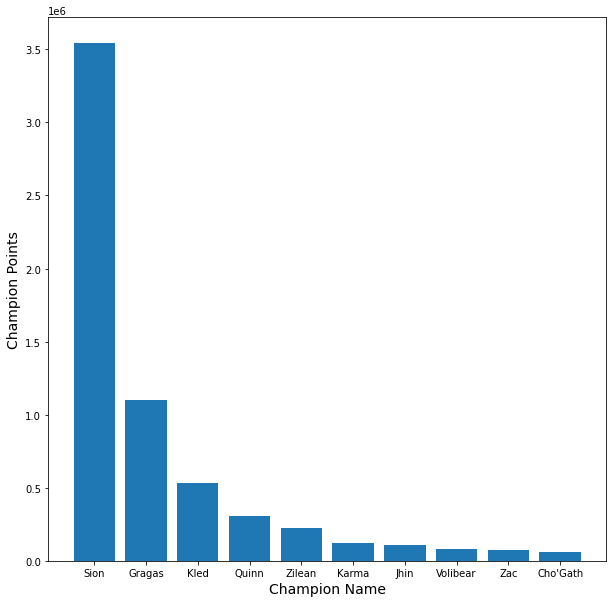

In [159]:
#Visualize the Champion points of the most played champion in a bar chart 
import matplotlib.pyplot as plt
x = mostPlayedChamp1['Champion Name']
y = mostPlayedChamp1['championPoints']
fig, ax = plt.subplots(figsize = (10,10))
ax.set_ylabel("Champion Points", size = 14)
ax.set_xlabel("Champion Name", size = 14)
ax.bar(x, y)

<BarContainer object of 10 artists>

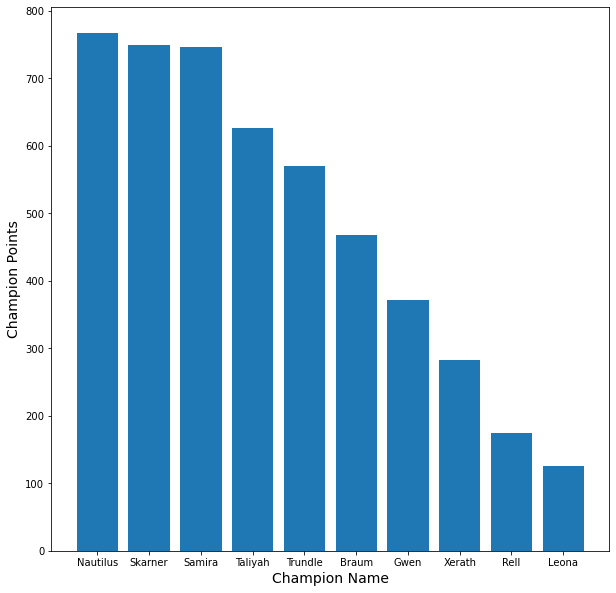

In [160]:
#Visualize the Champion points of the least played champion in a bar chart 
x = leastPlayedChamp1['Champion Name']
y = leastPlayedChamp1['championPoints']
fig, ax = plt.subplots(figsize = (10,10))
ax.set_ylabel("Champion Points", size = 14)
ax.set_xlabel("Champion Name", size = 14)
ax.bar(x, y)

In [161]:
#you can analyse any number of champions played by the player E.g. for top 20  Champ_mastery[:20]
allPlayedChamp = pd.DataFrame(Champ_mastery) 
allPlayedChamp1 = allPlayedChamp.drop(["summonerId","chestGranted","tokensEarned","championPointsUntilNextLevel"],axis =1)

allPlayedChamp1

,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel
0,14,7,3542385,1659026587000,3520785
1,79,6,1099565,1659032735000,1077965
2,240,7,533931,1655387338000,512331
3,133,7,307338,1659024377000,285738
4,26,6,225468,1657819125000,203868
...,...,...,...,...,...
146,201,1,468,1625817700000,468
147,887,1,371,1618858619000,371
148,101,1,283,1620412803000,283
149,526,1,175,1640351191000,175


In [162]:
#stroing champion name and roles by matching the championId from each dataframe
allChamp = []
allTags =  []
for i in range(len(allPlayedChamp1)):
    g = allPlayedChamp1.championId[i]
    allChamp.append(champIdList.get(str(g)))
    allTags.append(champTagsList.get(str(g)))

In [163]:
allTags = pd.Series(allTags)
allTags

0           [Tank, Fighter]
1           [Fighter, Mage]
2           [Fighter, Tank]
3      [Marksman, Assassin]
4           [Support, Mage]
               ...         
146         [Support, Tank]
147     [Fighter, Assassin]
148                  [Mage]
149         [Tank, Support]
150         [Tank, Support]
Length: 151, dtype: object

In [164]:
#counting the number of individual roles plyed 
champ = {}
for i in allTags:
    for j in i:
        if j not in champ:
            champ[j] = 1
        else:
            champ[j] += 1

<BarContainer object of 6 artists>

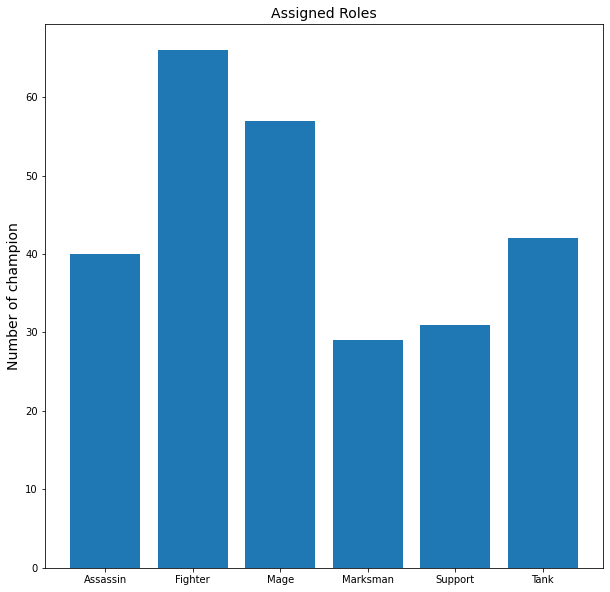

In [165]:
# Representing player's most played roles in a bar chart 
champList = champ.items()
champList = sorted(champList) 
x, y = zip(*champList) 
fig, ax = plt.subplots(figsize = (10,10))
ax.set_ylabel("Number of champion", size = 14)
ax.set_title("Assigned Roles", size = 14)
ax.bar(x, y)

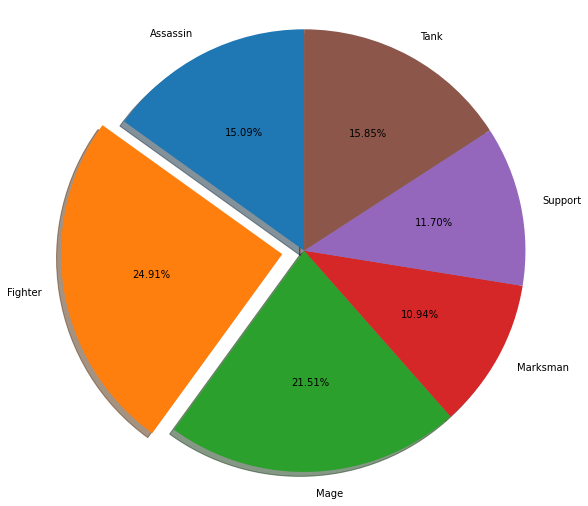

In [166]:
# Representing player's most played roles in a pie chart 
x, y = zip(*champList) #Splitong data into levels and values
explode = (0, 0.1, 0, 0,0,0)  # only "explode" the Fighter slice 
fig1, ax1 = plt.subplots(figsize = (9,9))
ax1.pie(y, explode=explode, labels=x, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()